Informe Básico de Ventas
---

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Caso de Estudio: Análisis de Ventas en Tienda de Muebles

Este caso de estudio simple, tiene como objetivo analizar los datos de ventas de una tienda de muebles, con el fin de extraer conclusiones útiles sobre el comportamiento de las ventas, las ganancias, los descuentos y los métodos de envío. Se ha realizado un análisis de las ventas de sus productos. Además, se han analizado las fluctuaciones de ventas a lo largo de los años, los patrones estacionales y las tendencias en los métodos de envío.

Requerimientos del Proyecto:

1. Generar un informe que muestre las ventas totales, la cantidad total y las ganancias totales para todo el año.
2. Crear una tabla resumen que muestre las ventas totales por mes.
3. Proporcionar un desglose de las ventas por subcategoría de producto.
4. Identificar los 10 productos principales por ventas totales.
5. Resumir las ventas, ganancias y descuentos totales por modo de envío.

In [22]:
# Cargar el archivo
file_path = './furniture (1).xlsx'
data = pd.read_excel(file_path, sheet_name='sales')
data.head()

,row_id,customer_id,customer_name,order_id,order_date,ship_date,ship_mode,market_segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,total_sales,quantity,discount,profit
0,1,CG-12520,Claire Gute,CA-2016-152156,2022-11-08,2022-11-11,Second Class,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CG-12520,Claire Gute,CA-2016-152156,2022-11-08,2022-11-11,Second Class,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,SO-20335,Sean O'Donnell,US-2015-108966,2021-10-11,2021-10-18,Standard Class,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,BH-11710,Brosina Hoffman,CA-2014-115812,2020-06-09,2020-06-14,Standard Class,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,BH-11710,Brosina Hoffman,CA-2014-115812,2020-06-09,2020-06-14,Standard Class,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [23]:
# Convertir columnas relevantes a tipos adecuados
data['total_sales'] = pd.to_numeric(data['total_sales'], errors='coerce')
data['quantity'] = pd.to_numeric(data['quantity'], errors='coerce')
data['profit'] = pd.to_numeric(data['profit'], errors='coerce')
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')

## 1. Generar un informe que muestre las ventas totales, la cantidad total y las ganancias totales para todo el año.

In [24]:
# Agrupar por año y calcular totales
report = data.groupby(data['order_date'].dt.year).agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'profit': 'sum'
}).reset_index()

# Renombrar columnas
report.columns = ['Año', 'Ventas Totales', 'Cantidad Total', 'Ganancia Total']


In [25]:
# Imprimir el informe
print(report)

    Año  Ventas Totales  Cantidad Total  Ganancia Total
0  2020     157192.8531            1623       5457.7255
1  2021     170518.2370            1775       3015.2029
2  2022     198901.4360            2193       6959.9531
3  2023     215387.2692            2437       3018.3913


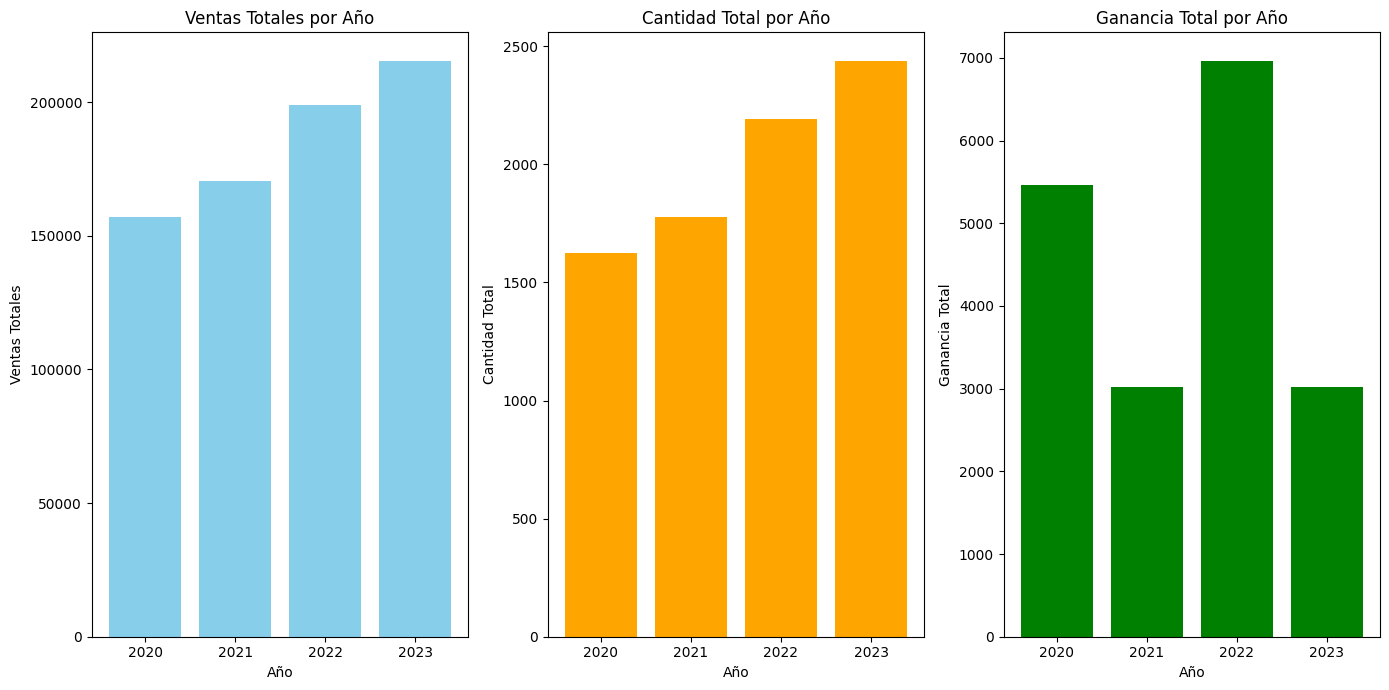

In [26]:
# Visualizaciones
plt.figure(figsize=(14, 7))

# Ventas Totales
plt.subplot(1, 3, 1)
plt.bar(report['Año'].astype(str), report['Ventas Totales'], color='skyblue')
plt.title('Ventas Totales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')

# Cantidad Total
plt.subplot(1, 3, 2)
plt.bar(report['Año'].astype(str), report['Cantidad Total'], color='orange')
plt.title('Cantidad Total por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad Total')

# Ganancia Total
plt.subplot(1, 3, 3)
plt.bar(report['Año'].astype(str), report['Ganancia Total'], color='green')
plt.title('Ganancia Total por Año')
plt.xlabel('Año')
plt.ylabel('Ganancia Total')

plt.tight_layout()
plt.show()

## 2. Crear una tabla resumen que muestre las ventas totales por mes.

In [27]:
# Crear tabla resumen por mes
monthly_report = data.groupby(data['order_date'].dt.to_period('M')).agg({
    'total_sales': 'sum'
}).reset_index()
monthly_report['order_date'] = monthly_report['order_date'].astype(str)
monthly_report.columns = ['Mes', 'Ventas Totales']

# Determinar el mes de menor y mayor ventas
min_sales = monthly_report.loc[monthly_report['Ventas Totales'].idxmin()]
max_sales = monthly_report.loc[monthly_report['Ventas Totales'].idxmax()]


# Imprimir la tabla resumen
print("\nTabla resumen de ventas totales por mes:")
print(monthly_report.head())


Tabla resumen de ventas totales por mes:
       Mes  Ventas Totales
0  2020-01        6242.525
1  2020-02        1839.658
2  2020-03       14573.956
3  2020-04        7944.837
4  2020-05        6912.787


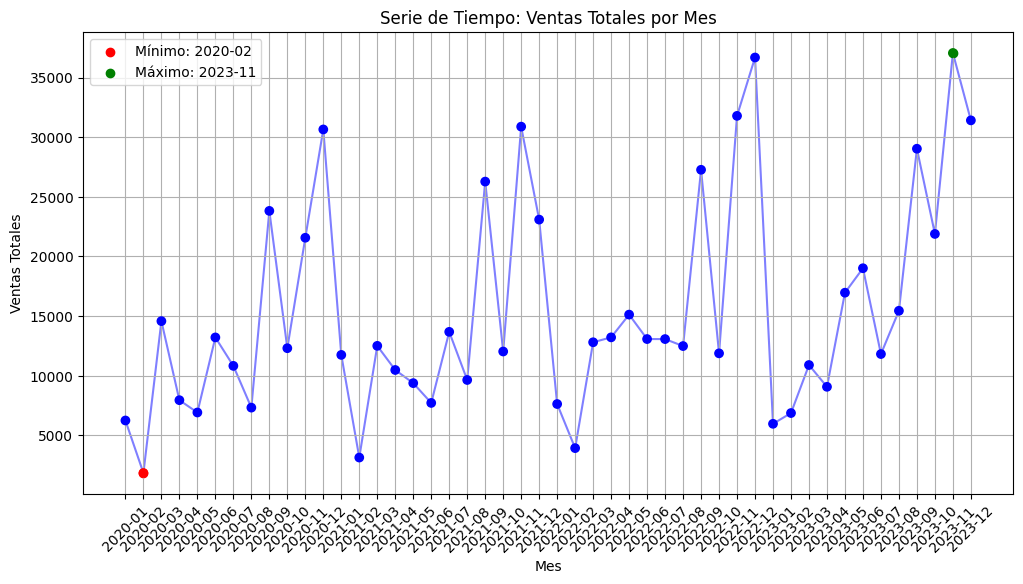

In [28]:
# Serie de tiempo de ventas totales por mes
plt.figure(figsize=(12, 6))
colors = ['red' if x == min_sales['Ventas Totales'] else 'green' if x == max_sales['Ventas Totales'] else 'blue' for x in monthly_report['Ventas Totales']]
plt.scatter(monthly_report['Mes'], monthly_report['Ventas Totales'], color=colors, zorder=2)
plt.plot(monthly_report['Mes'], monthly_report['Ventas Totales'], linestyle='-', color='blue', alpha=0.5, zorder=1)

# Añadir señalización para el mes de menor y mayor ventas
plt.scatter(min_sales['Mes'], min_sales['Ventas Totales'], color='red', label=f"Mínimo: {min_sales['Mes']}")
plt.scatter(max_sales['Mes'], max_sales['Ventas Totales'], color='green', label=f"Máximo: {max_sales['Mes']}")

plt.title('Serie de Tiempo: Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

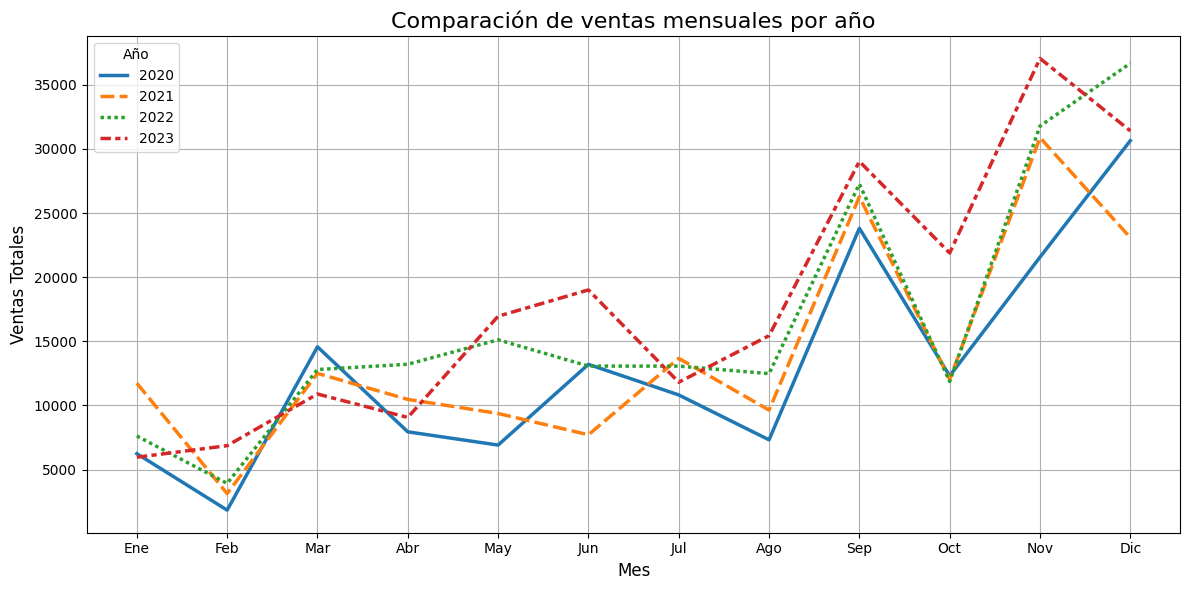

In [29]:
# Crear una columna separada para Año y Mes
data['Year'] = data['order_date'].dt.year
data['Month'] = data['order_date'].dt.month

# Agrupar por Año y Mes para sumar las ventas
yearly_monthly_sales = data.groupby(['Year', 'Month']).agg({'total_sales': 'sum'}).reset_index()

# Pivotar la tabla para tener los años como columnas
pivot_data = yearly_monthly_sales.pivot(index='Month', columns='Year', values='total_sales')

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_data, linewidth=2.5)

# Agregar etiquetas y título
plt.title('Comparación de ventas mensuales por año', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.legend(title='Año', loc='upper left', fontsize=10)
plt.xticks(range(1, 13), 
           ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Proporcionar un desglose de las ventas por subcategoría de producto.

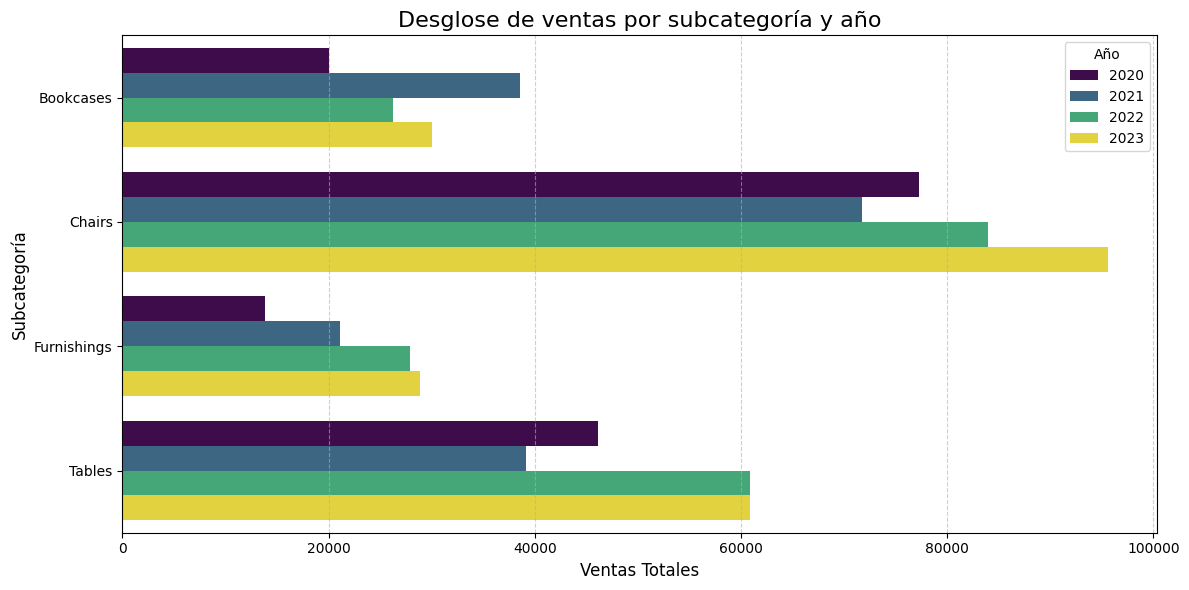

In [30]:
# Agrupar las ventas por subcategoría y año
data['Year'] = data['order_date'].dt.year
subcategory_sales_by_year = data.groupby(['sub_category', "Year"])['total_sales'].sum().reset_index()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(
    data=subcategory_sales_by_year,
    x='total_sales',
    y='sub_category',
    hue='Year',
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Desglose de ventas por subcategoría y año', fontsize=16)
plt.xlabel('Ventas Totales', fontsize=12)
plt.ylabel('Subcategoría', fontsize=12)
plt.legend(title='Año', loc='upper right', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## 4. Identificar los 10 productos principales por ventas totales.

In [31]:
# Agrupar las ventas totales por producto
product_sales = data.groupby('product_name')['total_sales'].sum().reset_index()

# Ordenar los productos por ventas totales en orden descendente
product_sales_sorted = product_sales.sort_values(by='total_sales', ascending=False)

# Seleccionar los 10 productos con mayores ventas
top_10_products = product_sales_sorted.head(10)

# Mostrar los resultados
print("Top 10 productos por ventas totales:")
print(top_10_products)

Top 10 productos por ventas totales:
                                          product_name  total_sales
206       HON 5400 Series Task Chairs for Big and Tall   21870.5760
321  Riverside Palais Royal Lawyers Bookcase, Royal...   15610.9656
40          Bretford Rectangular Conference Table Tops   12995.2915
201      Global Troy Executive Leather Low-Back Tilter   12975.3820
325                           SAFCO Arco Folding Chair   11572.7800
89               DMI Eclipse Executive Suite Bookcases   11046.6090
225  Hon Deluxe Fabric Upholstered Stacking Chairs,...   10637.5280
63   Chromcraft Bull-Nose Wood Oval Conference Tabl...    9917.6400
42   Bush Advantage Collection Racetrack Conference...    9544.7250
205         GuestStacker Chair with Chrome Finish Legs    9070.9440


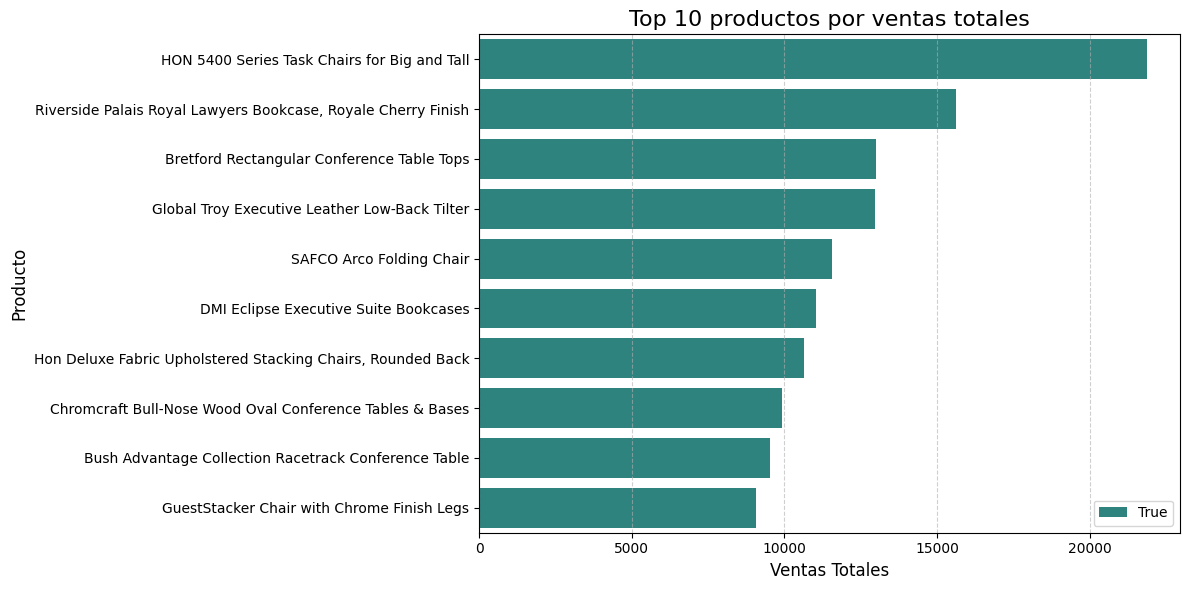

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='total_sales', y='product_name',hue = True, palette='viridis')
plt.title('Top 10 productos por ventas totales', fontsize=16)
plt.xlabel('Ventas Totales', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##  Escribir código que resuma las ventas totales, las ganancias totales y el descuento total por modo de envío.

In [33]:
# Calcular el monto total de descuento para cada pedido
data['Discount Amount'] = data['total_sales'] * data['discount']

# Agrupar por 'Ship Mode' y calcular la suma de 'Sales', 'Profit' y 'Discount Amount'
summary = data.groupby('ship_mode').agg(
    TotalSales=('total_sales', 'sum'),
    TotalProfit=('profit', 'sum'),
    TotalDiscount=('Discount Amount', 'sum')
).reset_index()

# Ordenar los resultados por 'TotalSales' en orden descendente
summary = summary.sort_values(by='TotalSales', ascending=False)

# Mostrar el resumen
print(summary)

        ship_mode   TotalSales  TotalProfit  TotalDiscount
3  Standard Class  435831.4690   10360.7156   73230.731260
2    Second Class  156289.0244    4226.2614   24611.738798
0     First Class  110730.5229    3066.9474   18447.775383
1        Same Day   39148.7790     797.3484    7226.295600


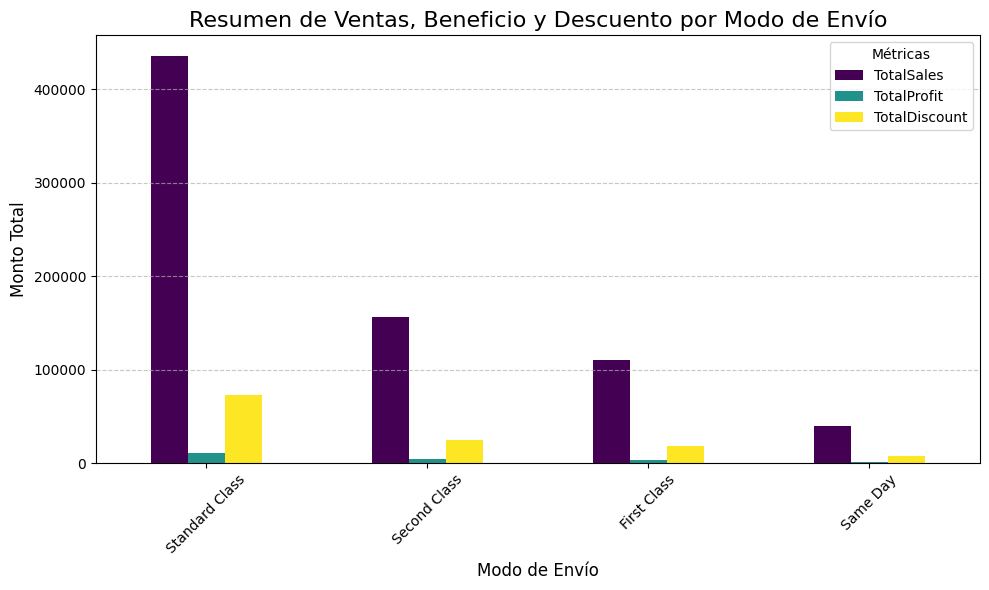

In [34]:
# Configurar el gráfico
summary.plot(
    x='ship_mode',
    y=['TotalSales', 'TotalProfit', 'TotalDiscount'],
    kind='bar',
    figsize=(10, 6),
    colormap='viridis'
)

# Personalizar el gráfico
plt.title('Resumen de Ventas, Beneficio y Descuento por Modo de Envío', fontsize=16)
plt.xlabel('Modo de Envío', fontsize=12)
plt.ylabel('Monto Total', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Métricas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Conclusiones:
En el análisis de ventas de la tienda de muebles, se observó que el año con mayores ventas fue 2023, con un incremento en la cantidad de productos vendidos. Sin embargo, el año de mayor ganancia fue 2022, lo que sugiere que las ventas en ese año fueron más rentables en términos de margen. Al analizar la serie de tiempo de ventas totales por mes desde 2020 hasta 2023, se identificaron fluctuaciones en las ventas, con el mes de febrero de 2020 marcando el mínimo y noviembre de 2023 alcanzando el máximo de ventas.

En la comparación año a año por mes, se identificaron patrones claros: las ventas tienden a aumentar en septiembre y noviembre, independientemente del año, mientras que febrero es un mes con bajas ventas. Este comportamiento podría estar relacionado con factores estacionales o de demanda. En términos de productos, se destacan las sillas como el producto más vendido año tras año. Entre las sillas, el modelo "HON 5400 Series Task Chairs for Big and Tall" fue el más destacado en términos de volumen de ventas.

Por último, se observó que la tienda ofrece cuatro modalidades de envío, siendo el envío estándar el más utilizado y el que genera la mayor cantidad de ventas, ganancias y descuentos. Este hallazgo sugiere que los clientes prefieren opciones de envío más económicas, lo que puede influir en las decisiones estratégicas relacionadas con las promociones y la logística.